In [ ]:
ML - Task1- Measures of Descriptive statistics-Central Tendency, spread @channel
You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Detect the outliers and remove it using:
 Mean Function
Percentile method
IQR(Inter quartile range method)
Normal distribution
Zscore method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="C:\\Users\\afla1\\Downloads\\house_price.csv"
house_df=pd.read_csv(url)
house_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
house_df.shape

(13200, 7)

In [4]:
house_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
house_df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [11]:
house_df.duplicated().sum()

1049

**duplicates detect**

In [16]:
house_df=house_df.drop_duplicates()

In [18]:
house_df.duplicated().sum()

0

In [8]:
house_df.columns.to_list()

['location', 'size', 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']

## meanfunction

In [19]:
house_df.price_per_sqft.min()

267

In [20]:
house_df.price_per_sqft.max()

12000000

In [21]:
house_df.price_per_sqft.mean()

8132.641840177763

In [22]:
house_df.price_per_sqft.median()

5500.0

**significant diffrence between mean and median shows outlier presents**

In [23]:
house_df.total_sqft.mean()

1574.846013085343

C:\Users\afla1\AppData\Local\Temp\ipykernel_8856\3745317337.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of price per sqft with Outliers')

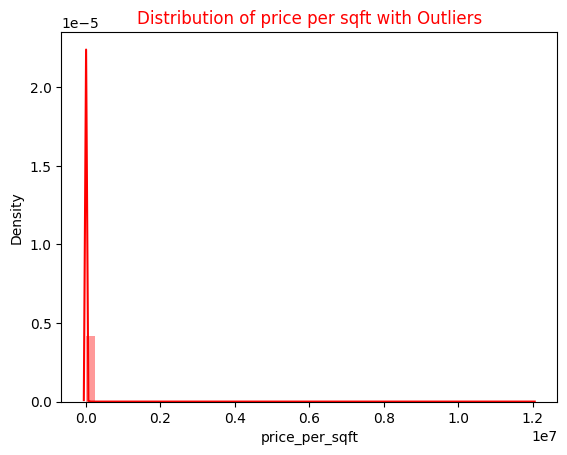

In [25]:
sns.distplot(house_df['price_per_sqft'],color='r')
plt.title('Distribution of price per sqft with Outliers',color='r')

<Axes: ylabel='price_per_sqft'>

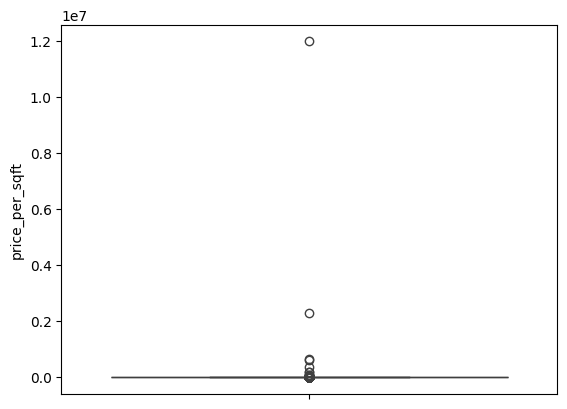

In [26]:
sns.boxplot(house_df["price_per_sqft"])

**median**

In [23]:
house_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [27]:
house_df.price_per_sqft.quantile([0.05,0.1,0.25,0.5,0.75,0.90,0.92,0.94,0.96,0.98,0.99])

0.05     3150.0
0.10     3513.0
0.25     4312.0
0.50     5500.0
0.75     7461.0
0.90    11904.0
0.92    13129.0
0.94    14695.0
0.96    16666.0
0.98    20000.0
0.99    24000.0
Name: price_per_sqft, dtype: float64

**shows variation in 98th and 99th percentile**

In [28]:
house_df[house_df.price_per_sqft>house_df.price_per_sqft.quantile(0.95)] #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13097,other,1 BHK,250.0,2.0,40.0,1,16000
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228


In [29]:
#Data without outliers
df1=house_df[house_df.price_per_sqft<house_df.price_per_sqft.quantile(0.95)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\afla1\AppData\Local\Temp\ipykernel_8856\2713776560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

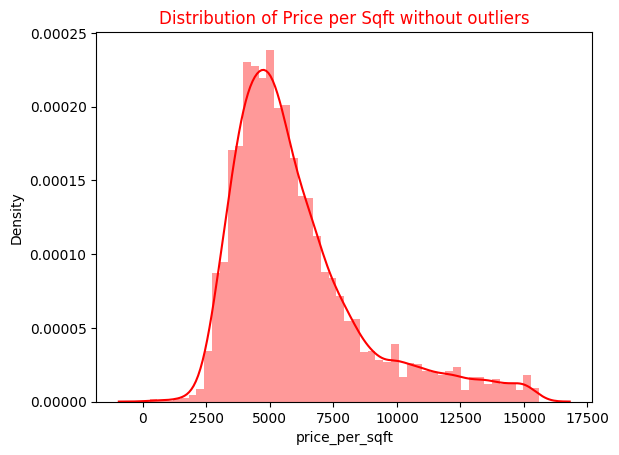

In [30]:
sns.distplot(df1['price_per_sqft'],color='r')
plt.title('Distribution of Price per Sqft without outliers',color='r')

<Axes: ylabel='price_per_sqft'>

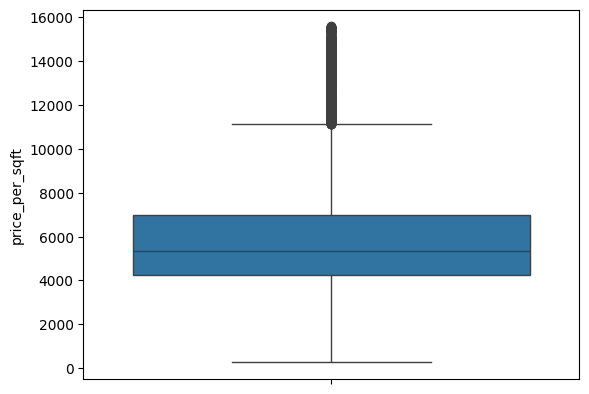

In [32]:
sns.boxplot(df1['price_per_sqft'])

In [34]:
print("Before removing outliers:",len(house_df))
print("After removing outliers:",len(df1))
print("Outliers:",len(house_df)-len(df1))

Before removing outliers: 12151
After removing outliers: 11542
Outliers: 609


# percentile method

In [36]:
upper_limit=house_df['price_per_sqft'].quantile(0.95)
lower_limit=house_df['price_per_sqft'].quantile(0.05)

print("Upper Limit:",upper_limit)
print("Lower Limit:",lower_limit)

Upper Limit: 15600.0
Lower Limit: 3150.0


C:\Users\afla1\AppData\Local\Temp\ipykernel_8856\1694334785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of Price Per Sqft with Outliers')

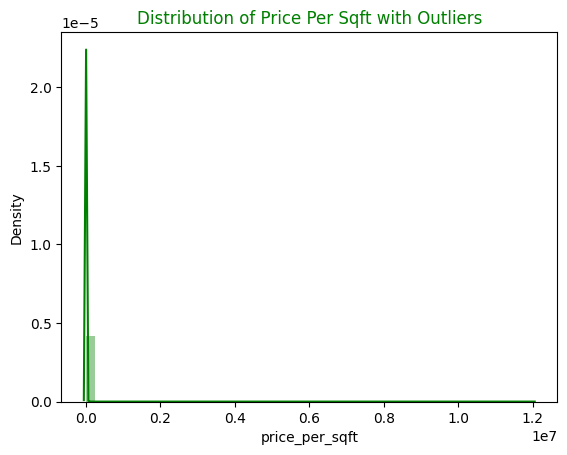

In [38]:
sns.distplot(house_df['price_per_sqft'],color='g')
plt.title('Distribution of Price Per Sqft with Outliers',color='g')

<Axes: ylabel='price_per_sqft'>

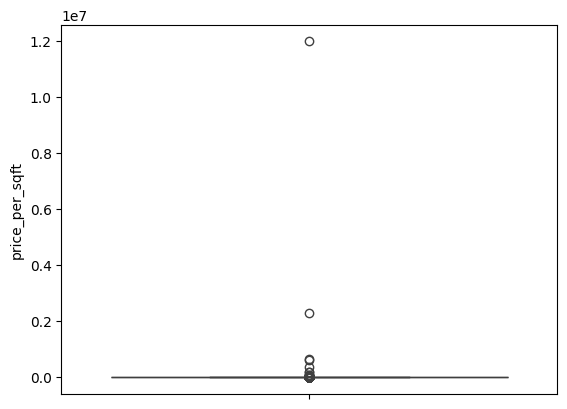

In [40]:
sns.boxplot(house_df['price_per_sqft'])

In [41]:
#finding outliers
house_df.loc[(house_df['price_per_sqft']>upper_limit) | (house_df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,33333
...,...,...,...,...,...,...,...
13121,Electronic City Phase II,3 BHK,1651.0,3.0,49.53,3,3000
13141,other,3 Bedroom,2000.0,2.0,360.00,3,18000
13142,other,2 BHK,1140.0,1.0,185.00,2,16228
13155,Kothannur,4 Bedroom,1600.0,4.0,45.00,4,2812


In [42]:
#deleting the outliers
df2=house_df.loc[(house_df['price_per_sqft']<=upper_limit) & (house_df['price_per_sqft']>=lower_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [43]:
print("Before removing outliers:",len(house_df))
print("After removing outliers:",len(df2))
print("Outliers:",len(house_df)-len(df2))

Before removing outliers: 12151
After removing outliers: 10940
Outliers: 1211


C:\Users\afla1\AppData\Local\Temp\ipykernel_8856\4070667691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

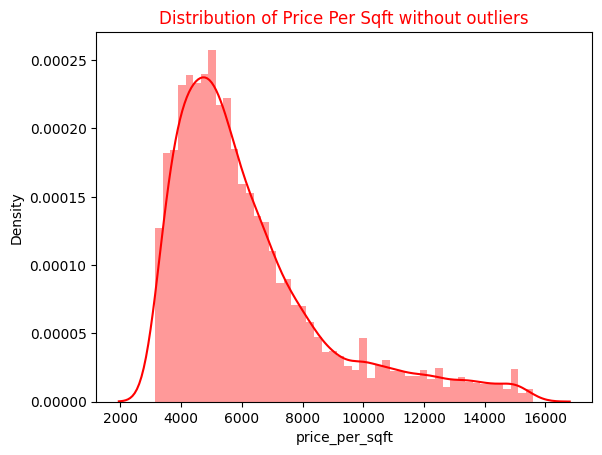

In [46]:
sns.distplot(df2['price_per_sqft'],color='r')
plt.title('Distribution of Price Per Sqft without outliers',color='r')


<Axes: ylabel='price_per_sqft'>

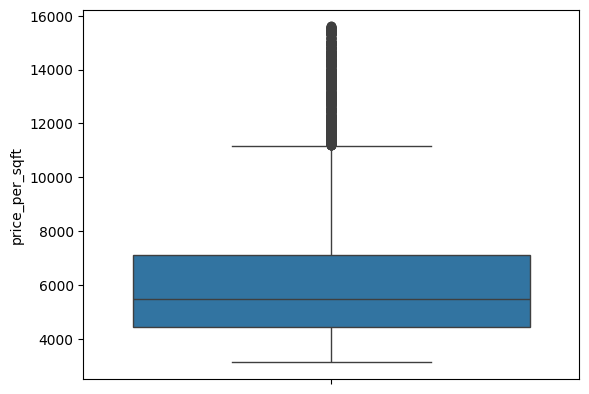

In [47]:
sns.boxplot(df2['price_per_sqft'])

After applying the percentile technique to remove outliers, our distplot nearly formed a bell curve, and we managed to get rid of 1211 outliers from the dataset.

In [49]:
#CAPPING -handle the outliers to upper or lower values
new_df2=house_df.copy()
new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df2.loc[(new_df2['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

<Axes: ylabel='price_per_sqft'>

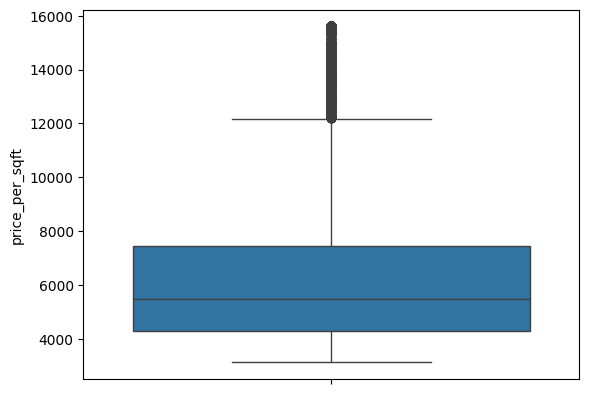

In [50]:
sns.boxplot(new_df2['price_per_sqft'])

#  IQR methods

C:\Users\afla1\AppData\Local\Temp\ipykernel_8856\2812985724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of price Per Sqft with outliers')

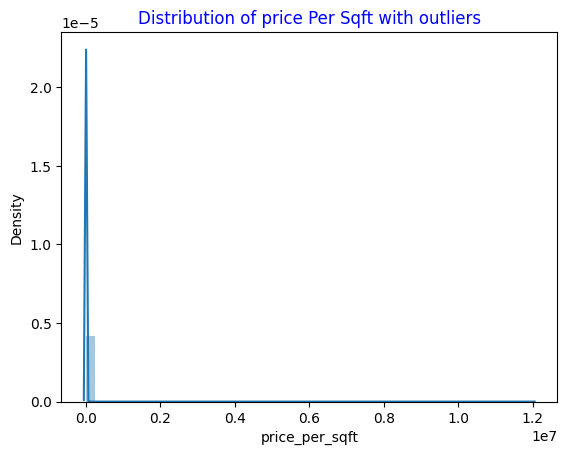

In [51]:
sns.distplot(house_df['price_per_sqft'])
plt.title('Distribution of price Per Sqft with outliers',color='b')

<Axes: ylabel='price_per_sqft'>

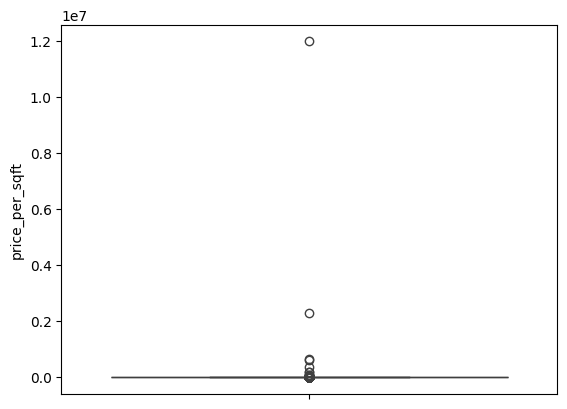

In [52]:
sns.boxplot(house_df['price_per_sqft'])

In [54]:
Q1=house_df.price_per_sqft.quantile(0.25)
Q3=house_df.price_per_sqft.quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("IQR=",IQR)

Q1= 4312.0
Q3= 7461.0
IQR= 3149.0


In [55]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print('Lower Whisker=',lower_whisker)
print('Upper Whisker=',upper_whisker)


Lower Whisker= -411.5
Upper Whisker= 12184.5


In [57]:
#finding otuliers
house_df[(house_df.price_per_sqft<-411.5) | (house_df.price_per_sqft>12184.5)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571


In [58]:
#df without outliers
df3=house_df[(house_df.price_per_sqft>-411.5) & (house_df.price_per_sqft<12184.5)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [60]:
print('Before removing outliers:',len(house_df))
print('After removing outliers',len(df3))
print('Outliers:',len(house_df)-len(df3))


Before removing outliers: 12151
After removing outliers 11009
Outliers: 1142


C:\Users\afla1\AppData\Local\Temp\ipykernel_8856\1244424865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

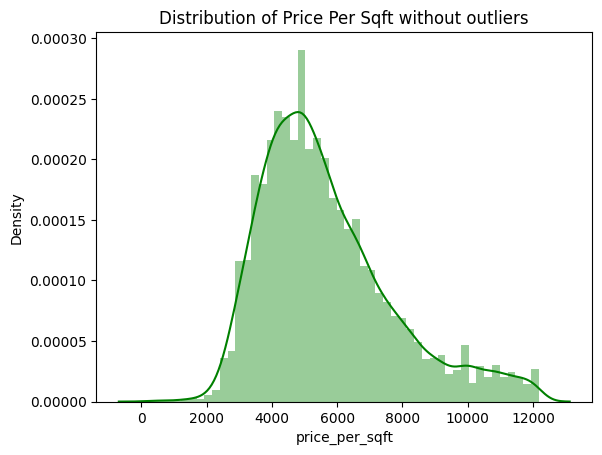

In [62]:
sns.distplot(df3['price_per_sqft'],color='g')
plt.title('Distribution of Price Per Sqft without outliers')


<Axes: ylabel='price_per_sqft'>

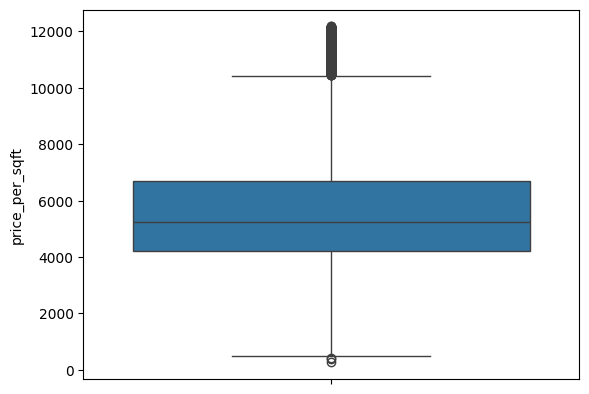

In [63]:
sns.boxplot(df3['price_per_sqft'])


Using IQR method to eliminate the outliers,we approached a bell shaped curve in the distplot and removed a total of 1142 outliers from the dataset

# normal distribution

In [64]:
house_df.price_per_sqft.describe()

count    1.215100e+04
mean     8.132642e+03
std      1.112329e+05
min      2.670000e+02
25%      4.312000e+03
50%      5.500000e+03
75%      7.461000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [65]:
m=house_df.price_per_sqft.mean()
m

8132.641840177763

In [66]:
s=house_df.price_per_sqft.std()
s

111232.90089570847

In [67]:
#-3sigma
m-3*s

-325566.06084694766

In [68]:
#finding outliers
house_df[(house_df.price_per_sqft<-325566.06084694766) | (house_df.price_per_sqft>341831.3445273032)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [69]:
#data without outliers
df4=house_df[(house_df.price_per_sqft>-325566.06084694766) & (house_df.price_per_sqft<341831.3445273032)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [70]:
print("Before removing outliers:",len(house_df))
print("After removing outliers:",len(df4))
print("Outliers:",len(house_df)-len(df4))


Before removing outliers: 12151
After removing outliers: 12146
Outliers: 5


C:\Users\afla1\AppData\Local\Temp\ipykernel_8856\4222713904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'],color='m')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

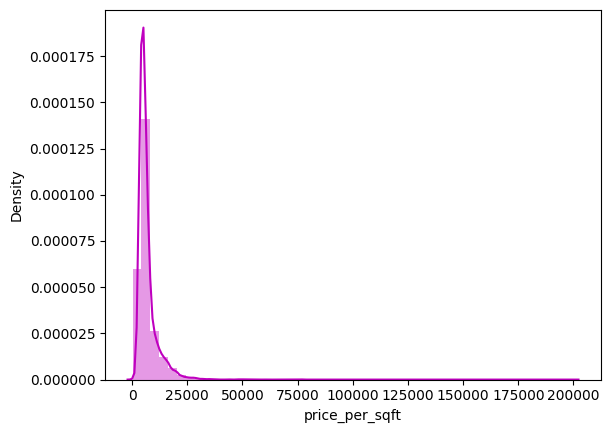

In [71]:
sns.distplot(df4['price_per_sqft'],color='m')

<Axes: ylabel='price_per_sqft'>

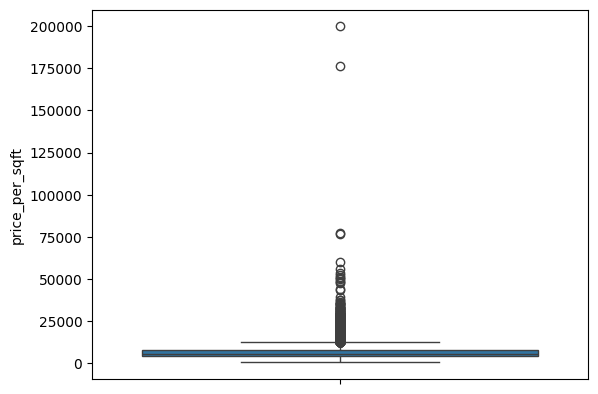

In [72]:
sns.boxplot(df4['price_per_sqft'])

Using the Normal Distributon Method, before removing outliers, there were 12151 data rows. After removing the outliers, there were 12146 data rows.5 outliers are identified.

# z-score method

In [74]:
m=house_df.price_per_sqft.mean()
m

8132.641840177763

In [75]:
s=house_df.price_per_sqft.std()
s

111232.90089570847

In [79]:
lower_limit=m-3*s
lower_limit



-325566.06084694766

In [78]:
upper_limit=m+3*s
upper_limit

341831.3445273032

In [80]:
#data without outliers
df5=house_df[(house_df.price_per_sqft>lower_limit) & (house_df.price_per_sqft<upper_limit)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [81]:
print("Before Removing Outliers:",len(house_df))
print("After Removing Outliers:",len(df5))
print("Outliers:",len(house_df)-len(df5))

Before Removing Outliers: 12151
After Removing Outliers: 12146
Outliers: 5


C:\Users\afla1\AppData\Local\Temp\ipykernel_8856\546888992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['price_per_sqft'],color='b')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

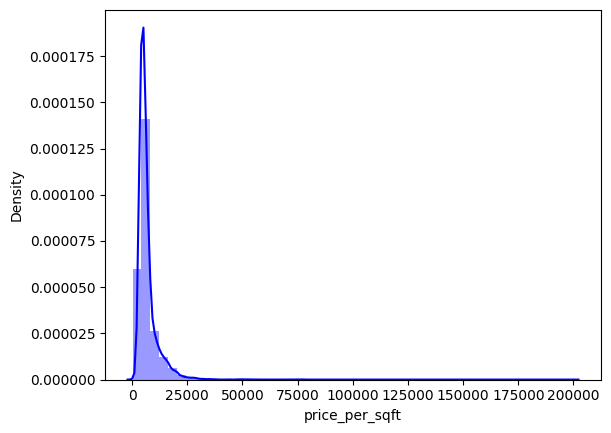

In [82]:
sns.distplot(df5['price_per_sqft'],color='b')

<Axes: ylabel='price_per_sqft'>

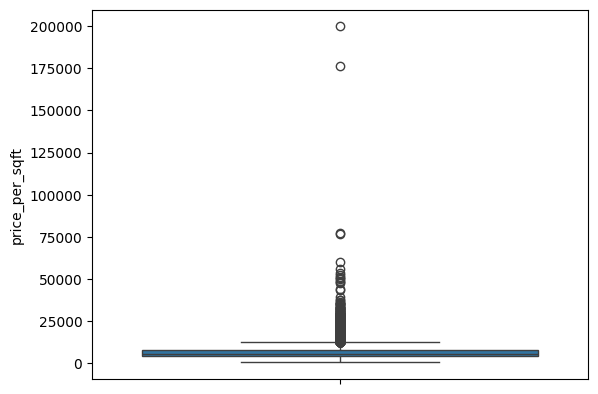

In [83]:
sns.boxplot(df5['price_per_sqft'])

using the zscore method, there were 12,151 data rows before removing outliers, and 12,146 data rows after removal, indicating a total of 5 outliers.

We identified the same outliers using both the normal distribution and z-score method, indicating same process in our outlier removal approach.

# correlation between numerical columns

In [86]:
#finding the numerical columns
#checking the dataset and selecting the numerical columns
num_col=house_df.select_dtypes(include=['int', 'float']).columns
num_col

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [87]:
#compute correlation mathrix
corre_matrix=house_df[num_col].corr()

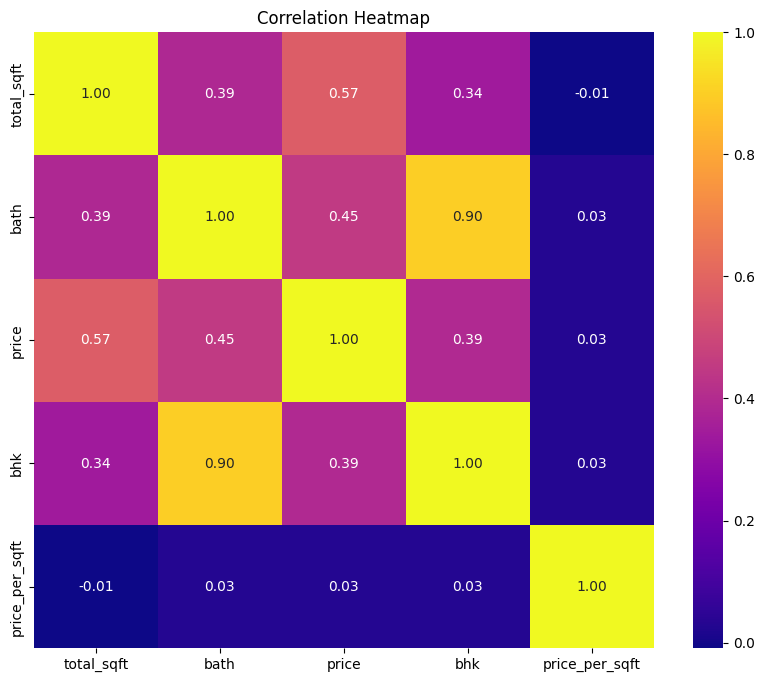

In [88]:
#plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corre_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**bath and bhk**shows highly correlation about **0.90**.so we can choose any one independant variable for further analysis(shows multicollinearity)

other variables are moderatly correlated.so we neglected

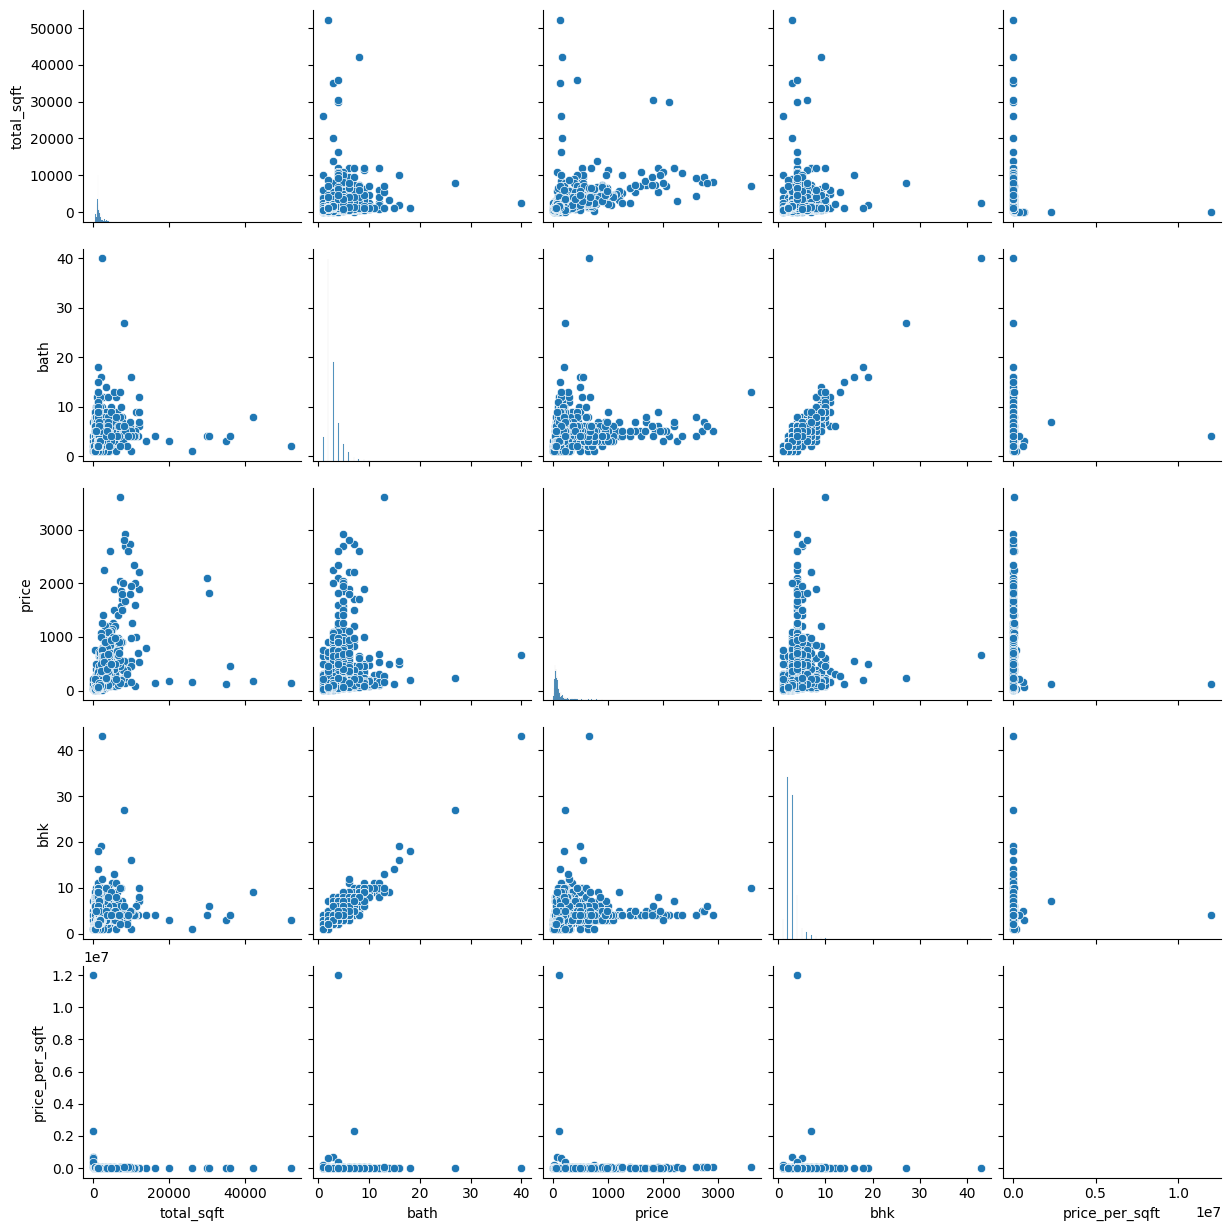

In [93]:
#plot scatterplot
sns.pairplot(house_df)
plt.show()